## What is DeepLearning?


Deep learning is a computer technique to extract and transform data–-with use cases ranging from human speech recognition to animal imagery classification–-by using multiple layers of neural networks. Each of these layers takes its inputs from previous layers and progressively refines them. The layers are trained by algorithms that minimize their errors and improve their accuracy. In this way, the network learns to perform a specified task.

> : A PhD is definitely not required. All that matters is a deep understanding of AI & ability to implement NNs in a way that is actually useful (latter point is what’s truly hard). Don’t care if you even graduated high school.

## What is Machine Learning?



Machine learning is, like regular programming, a way to get computers to complete a specific task. But how would we use regular programming to do what we just did in the last section: recognize dogs versus cats in photos? We would have to write down for the computer the exact steps necessary to complete the task.

Normally, it's easy enough for us to write down the steps to complete a task when we're writing a program. We just think about the steps we'd take if we had to do the task by hand, and then we translate them into code. For instance, we can write a function that sorts a list. In general, we'd write a function that looks something like (where *inputs* might be an unsorted list, and *results* a sorted list).


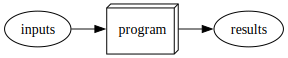

In [ ]:
#hide_input
#caption A traditional program
#id basic_program
#alt Pipeline inputs, program, results
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

But for recognizing objects in a photo that's a bit tricky; what *are* the steps we take when we recognize an object in a picture? We really don't know, since it all happens in our brain without us being consciously aware of it!

Right back at the dawn of computing, in 1949, an IBM researcher named Arthur Samuel started working on a different way to get computers to complete tasks, which he called *machine learning*. In his classic 1962 essay "Artificial Intelligence: A Frontier of Automation", he wrote:

> : Programming a computer for such computations is, at best, a difficult task, not primarily because of any inherent complexity in the computer itself but, rather, because of the need to spell out every minute step of the process in the most exasperating detail. Computers, as any programmer will tell you, are giant morons, not giant brains.

His basic idea was this: instead of telling the computer the exact steps required to solve a problem, show it examples of the problem to solve, and let it figure out how to solve it itself. This turned out to be very effective: by 1961 his checkers-playing program had learned so much that it beat the Connecticut state champion! Here's how he described his idea (from the same essay as above):

> : Suppose we arrange for some automatic means of testing the effectiveness of any current weight assignment in terms of actual performance and provide a mechanism for altering the weight assignment so as to maximize the performance. We need not go into the details of such a procedure to see that it could be made entirely automatic and to see that a machine so programmed would "learn" from its experience.

There are a number of powerful concepts embedded in this short statement: 

- The idea of a "weight assignment" 
- The fact that every weight assignment has some "actual performance"
- The requirement that there be an "automatic means" of testing that performance,  
- The need for a "mechanism" (i.e., another automatic process) for improving the performance by changing the weight assignments

Let us take these concepts one by one, in order to understand how they fit together in practice. First, we need to understand what Samuel means by a *weight assignment*.

Weights are just variables, and a weight assignment is a particular choice of values for those variables. The program's inputs are values that it processes in order to produce its results—for instance, taking image pixels as inputs, and returning the classification "dog" as a result. The program's weight assignments are other values that define how the program will operate.

Since they will affect the program they are in a sense another kind of input, so we will update our basic picture in <<basic_program>> and replace it with <<weight_assignment>> in order to take this into account.

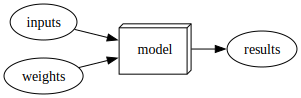

In [ ]:
#hide_input
#caption A program using weight assignment
#id weight_assignment
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

We've changed the name of our box from *program* to *model*. This is to follow modern terminology and to reflect that the *model* is a special kind of program: it's one that can do *many different things*, depending on the *weights*. It can be implemented in many different ways. For instance, in Samuel's checkers program, different values of the weights would result in different checkers-playing strategies. 

(By the way, what Samuel called "weights" are most generally referred to as model *parameters* these days, in case you have encountered that term. The term *weights* is reserved for a particular type of model parameter.)

Next, Samuel said we need an *automatic means of testing the effectiveness of any current weight assignment in terms of actual performance*. In the case of his checkers program, the "actual performance" of a model would be how well it plays. And you could automatically test the performance of two models by setting them to play against each other, and seeing which one usually wins.

Finally, he says we need *a mechanism for altering the weight assignment so as to maximize the performance*. For instance, we could look at the difference in weights between the winning model and the losing model, and adjust the weights a little further in the winning direction.

We can now see why he said that such a procedure *could be made entirely automatic and... a machine so programmed would "learn" from its experience*. Learning would become entirely automatic when the adjustment of the weights was also automatic—when instead of us improving a model by adjusting its weights manually, we relied on an automated mechanism that produced adjustments based on performance.

<<training_loop>> shows the full picture of Samuel's idea of training a machine learning model.

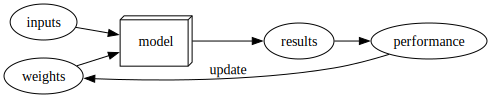

In [ ]:
#hide_input
#caption Training a machine learning model
#id training_loop
#alt The basic training loop
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

Notice the distinction between the model's *results*  (e.g., the moves in a checkers game) and its *performance* (e.g., whether it wins the game, or how quickly it wins). 

Also note that once the model is trained—that is, once we've chosen our final, best, favorite weight assignment—then we can think of the weights as being *part of the model*, since we're not varying them any more.

Therefore, actually *using* a model after it's trained looks like <<using_model>>.

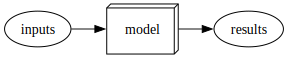

In [ ]:
#hide_input
#caption Using a trained model as a program
#id using_model
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

This looks identical to our original diagram in <<basic_program>>, just with the word *program* replaced with *model*. This is an important insight: *a trained model can be treated just like a regular computer program*.

> jargon: Machine Learning: The training of programs developed by allowing a computer to learn from its experience, rather than through manually coding the individual steps.

### What Is a Neural Network?


It's not too hard to imagine what the model might look like for a checkers program. There might be a range of checkers strategies encoded, and some kind of search mechanism, and then the weights could vary how strategies are selected, what parts of the board are focused on during a search, and so forth. But it's not at all obvious what the model might look like for an image recognition program, or for understanding text, or for many other interesting problems we might imagine.

What we would like is some kind of function that is so flexible that it could be used to solve any given problem, just by varying its weights. Amazingly enough, this function actually exists! It's the neural network, which we already discussed. That is, if you regard a neural network as a mathematical function, it turns out to be a function which is extremely flexible depending on its weights. A mathematical proof called the *universal approximation theorem* shows that this function can solve any problem to any level of accuracy, in theory. The fact that neural networks are so flexible means that, in practice, they are often a suitable kind of model, and you can focus your effort on the process of training them—that is, of finding good weight assignments.

But what about that process?  One could imagine that you might need to find a new "mechanism" for automatically updating weights for every problem. This would be laborious. What we'd like here as well is a completely general way to update the weights of a neural network, to make it improve at any given task. Conveniently, this also exists!

This is called *stochastic gradient descent* (SGD). We'll see how neural networks and SGD work in detail in <<chapter_mnist_basics>>, as well as explaining the universal approximation theorem. For now, however, we will instead use Samuel's own words: *We need not go into the details of such a procedure to see that it could be made entirely automatic and to see that a machine so programmed would "learn" from its experience.*

> J: Don't worry, neither SGD nor neural nets are mathematically complex. Both nearly entirely rely on addition and multiplication to do their work (but they do a _lot_ of addition and multiplication!). The main reaction we hear from students when they see the details is: "Is that all it is?"

In other words, to recap, a neural network is a particular kind of machine learning model, which fits right in to Samuel's original conception. Neural networks are special because they are highly flexible, which means they can solve an unusually wide range of problems just by finding the right weights. This is powerful, because stochastic gradient descent provides us a way to find those weight values automatically.

Having zoomed out, let's now zoom back in and revisit our image classification problem using Samuel's framework.

Our inputs are the images. Our weights are the weights in the neural net. Our model is a neural net. Our results are the values that are calculated by the neural net, like "dog" or "cat."

What about the next piece, an *automatic means of testing the effectiveness of any current weight assignment in terms of actual performance*? Determining "actual performance" is easy enough: we can simply define our model's performance as its accuracy at predicting the correct answers.

Putting this all together, and assuming that SGD is our mechanism for updating the weight assignments, we can see how our image classifier is a machine learning model, much like Samuel envisioned.

<a id="uni_apprx_theo"></a>
### **What Is the Universal Approximation Theorem?**


<img src="images/the_universal-approximation-theorem.png" width=600 height=400/>

The **Universal Approximation Theorem** says this:

> A neural network with just **one hidden layer** (and enough neurons in that layer) can approximate **any function**, no matter how complicated, as long as the function is continuous.

In plain English:
- If you have a problem where you want to map inputs to outputs (like predicting house prices, recognizing images, etc.), a neural network can learn to do it.
- It doesn’t matter how crazy or complex the relationship between inputs and outputs is—given enough neurons, the neural network can figure it out.

### **Why Is This Important?**

It means neural networks are **super flexible**. You don’t need to design a specific formula or rule for every problem. Instead, you can throw data at a neural network, and it will "learn" the pattern by itself.

### **An Analogy**

Imagine you’re trying to draw any shape—say, a circle, a wavy line, or even a weird squiggle. Now imagine you have a bunch of simple building blocks (like LEGO pieces). The Universal Approximation Theorem says:

> With enough LEGO pieces, you can build **any shape** you want.

In this analogy:
- The "shape" is the function you’re trying to approximate (e.g., predicting house prices based on features like size, location, etc.).
- The "LEGO pieces" are the neurons in the neural network.

### **How Does It Work?**

1. **Neurons Are Like Little Functions**:
   - Each neuron in the hidden layer performs a simple calculation (like multiplying inputs by weights and applying an activation function).

2. **Combine Neurons to Approximate Complex Patterns**:
   - By combining many neurons together, the network can create more and more complex patterns.
   - Think of it like adding up lots of simple curves to make a complicated curve.

3. **One Hidden Layer Is Enough**:
   - The theorem says you only need **one hidden layer** to approximate any function. However, in practice, deeper networks (with multiple layers) often work better and are more efficient.

### **Limitations**

While the theorem is powerful, there are some important caveats:
1. **"Enough Neurons" Can Be a Lot**:
   - The theorem doesn’t say how many neurons you’ll need. For very complex problems, you might need thousands or millions of neurons.

2. **Training Is Hard**:
   - Even if a neural network *can* approximate any function, actually training it to do so might be tricky. You need good data, a good optimization algorithm, and lots of computational power.

3. **Continuous Functions Only**:
   - The theorem applies to continuous functions (smooth, unbroken patterns). If your problem involves sudden jumps or discontinuities, the neural network might struggle.

### **Key Takeaways**

1. **What It Says**:
   - A neural network with one hidden layer can learn to approximate almost any function.

2. **Why It Matters**:
   - You don’t need to design custom solutions for every problem. Neural networks can "figure it out" for you.

3. **Simple Analogy**:
   - Think of neurons as LEGO pieces. With enough of them, you can build any shape (or approximate any function).

4. **Real-World Use**:
   - This is why neural networks are used everywhere—from image recognition to language translation to self-driving cars.

### **Final Answer**

The **Universal Approximation Theorem** says that a neural network with one hidden layer can learn to mimic almost any function, no matter how complicated, as long as you give it enough neurons. It’s like saying: "With enough LEGO pieces, you can build anything!" 😊

---
---

## What is a metric? 


A *metric* is a function that measures the quality of the model's predictions using the validation set, and will be printed at the end of each *epoch*. In this case, we're using `error_rate`, which is a function provided by fastai that does just what it says: tells you what percentage of images in the validation set are being classified incorrectly. Another common metric for classification is `accuracy` (which is just `1.0 - error_rate`). fastai provides many more, which will be discussed throughout this book.

The concept of a metric may remind you of *loss*, but there is an important distinction. The entire purpose of loss is to define a "measure of performance" that the training system can use to update weights automatically. In other words, a good choice for loss is a choice that is easy for stochastic gradient descent to use. But a metric is defined for human consumption, so a good metric is one that is easy for you to understand, and that hews as closely as possible to what you want the model to do. At times, you might decide that the loss function is a suitable metric, but that is not necessarily the case.

## What is Label?


The data that we're trying to predict, such as "dog" or "cat"

## What is Transfer Learning?



Using a pretrained model for a task different to what it was originally trained for is known as *transfer learning*. Unfortunately, because transfer learning is so under-studied, few domains have pretrained models available. For instance, there are currently few pretrained models available in medicine, making transfer learning challenging to use in that domain. In addition, it is not yet well understood how to use transfer learning for tasks such as time series analysis.

## What is CNN (Convolutional Neural Network)?


It's the current state-of-the-art approach to creating computer vision models. Their structure is inspired by how the human vision system works.
Convolutional neural network, is a type of neural network that works particularly well for computer vision tasks.

## What is Architecture?


The architecture only describes a *template* for a mathematical function; it doesn't actually do anything until we provide values for the millions of parameters it contains. Picking an architecture isn't a very important part of the deep learning process. It's something that academics love to talk about, but in practice it is unlikely to be something you need to spend much time on. There are some standard architectures that work most of the time, and in this case we're using one called _ResNet_ that we'll be talking a lot about during the book; it is both fast and accurate for many datasets and problems. The `34` in `resnet34` refers to the number of layers in this variant of the architecture (other options are `18`, `50`, `101`, and `152`). Models using architectures with more layers take longer to train, and are more prone to overfitting (i.e. you can't train them for as many epochs before the accuracy on the validation set starts getting worse). On the other hand, when using more data, they can be quite a bit more accurate.

## What is a Model?


The combination of the architecture with a particular set of parameters.
Every model starts with a choice of architecture, a general template for how that kind of model works internally. The process of training (or fitting) the model is the process of finding a set of parameter values (or weights) that specialize that general architecture into a model that works well for our particular kind of data. In order to define how well a model does on a single prediction, we need to define a loss function, which determines how we score a prediction as good or bad.

## What are Paramters?


The values in the model that change what task it can do, and are updated through model training.

## What is Stepping paramter?

**Stepping parameters** simply means **updating the values of the model's parameters (like weights and biases)** to make the model better at its task. 

Here’s how it works in simple terms:

1. **Why Step?**
   - The goal is to minimize the **loss** (the error between the model's predictions and the actual data).
   - To do this, we adjust the parameters step by step until the model improves.

2. **How Do We Step?**
   - Using the **gradient** (which tells us how much each parameter affects the loss), we nudge the parameters in the right direction.
   - The size of the step is controlled by the **learning rate**.

3. **What Happens During a Step?**
   - For each parameter (e.g., weight $ w $ or bias $ b $):
     $$
     \text{New Parameter} = \text{Old Parameter} - \text{Learning Rate} \cdot \text{Gradient}.
     $$
   - If the gradient is positive, the parameter decreases. If the gradient is negative, the parameter increases.

4. **Why Call It "Stepping"?**
   - Think of it like walking downhill: Each step moves you closer to the bottom (the minimum loss). You take small steps (controlled by the learning rate) based on the slope (gradient).

In short: **Stepping parameters = Updating weights and biases to reduce the loss and improve the model.** 😊

## What is Learning Rate (LR)?

The **learning rate** is a small number that controls **how big of a step** we take when updating the model's parameters during training. 

- If the learning rate is **too small**, the model learns very slowly.
- If the learning rate is **too large**, the model might overshoot the optimal solution.

In short:  
**Learning rate = Step size for updating parameters to minimize the loss.** 😊

<a id="activation-function"></a>
## What is Activation Function?

<img src="images/activation_functions.avif" width=600 height=500 />

An activation function is a mathematical function applied to the output of a neuron. It introduces non-linearity into the model, allowing the network to learn and represent complex patterns in the data. Without this non-linearity feature, a neural network would behave like a linear regression model, no matter how many layers it has.

Activation function decides whether a neuron should be activated by calculating the weighted sum of inputs and adding a bias term. This helps the model make complex decisions and predictions by introducing non-linearities to the output of each neuron.

### Introducing Non-Linearity in Neural Network
Non-linearity means that the relationship between input and output is not a straight line. In simple terms, the output does not change proportionally with the input. A common choice is the ReLU function, defined as $σ(x)=max(0,x)$

Imagine you want to classify apples and bananas based on their shape and color.

If we use a linear function, it can only separate them using a straight line.
But real-world data is often more complex (e.g., overlapping colors, different lighting).
By adding a non-linear activation function (like ReLU, Sigmoid, or Tanh), the network can create curved decision boundaries to separate them correcty.

### Why is Non-Linearity Important in Neural Networks?
Neural networks consist of neurons that operate using weights, biases, and activation functions.

In the learning process, these weights and biases are updated based on the error produced at the output—a process known as backpropagation. Activation functions enable backpropagation by providing gradients that are essential for updating the weights and biases.

Without non-linearity, even deep networks would be limited to solving only simple, linearly separable problems. Activation functions empower neural networks to model highly complex data distributions and solve advanced deep learning tasks. Adding non-linear activation functions introduce flexibility and enable the network to learn more complex and abstract patterns from data.

### **How Many Types Are There?**

There are several common types of activation functions, but here are the most widely used ones:

#### 1. **Sigmoid**
   - Formula: $ \sigma(x) = \frac{1}{1 + e^{-x}} $
   - Output: Between `0` and `1`.
   - Use Case: Binary classification (e.g., predicting probabilities).
   - Example:
     ```python
     preds = xb.sigmoid()
     ```

#### 2. **ReLU (Rectified Linear Unit)**
   - Formula: $ \text{ReLU}(x) = \max(0, x) $
   - Output: `0` for negative inputs, and the input itself for positive inputs.
   - Use Case: Hidden layers in deep neural networks (fast and effective).
   - Example:
     ```python
     preds = torch.relu(xb)
     ```

#### 3. **Tanh (Hyperbolic Tangent)**
   - Formula: $ \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $
   - Output: Between `-1` and `1`.
   - Use Case: Similar to sigmoid, but outputs are centered around `0`, which can help with training stability.

#### 4. **Softmax**
   - Formula: $ \text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}} $
   - Output: Probabilities that sum to `1`.
   - Use Case: Multi-class classification (e.g., predicting one of 10 digits in MNIST).

### **Why Do We Need Activation Functions?**

1. **Introduce Non-Linearity**:
   - Without activation functions, every layer in a neural network would just perform a linear transformation, making the entire network equivalent to a single linear model.

2. **Enable Complex Learning**:
   - Activation functions allow the network to learn non-linear relationships in the data, which is crucial for solving real-world problems like image recognition, language processing, etc.

3. **Output Constraints**:
   - Some activation functions (like sigmoid and softmax) constrain the output to specific ranges (e.g., probabilities between `0` and `1`).

## What is Fine-Tuning (Fitting the Model)?

To make the training process go faster, we might start with a pretrained model—a model that has already been trained on someone else's data. We can then adapt it to our data by training it a bit more on our data, a process called fine-tuning.
This is the key to deep learning—determining how to fit the parameters of a model to get it to solve your problem. In order to fit a model, we have to provide at least one piece of information: how many times to look at each image **(known as number of *epochs*)**. The number of epochs you select will largely depend on how much time you have available, and how long you find it takes in practice to fit your model. If you select a number that is too small, you can always train for more epochs later.

But why is the method called `fine_tune`, and not `fit`? fastai actually *does* have a method called `fit`, which does indeed fit a model (i.e. look at images in the training set multiple times, each time updating the parameters to make the predictions closer and closer to the target labels). But in this case, we've started with a pretrained model, and we don't want to throw away all those capabilities that it already has. There are some important tricks to adapt a pretrained model for a new dataset—a process called *fine-tuning*.


> jargon: Fine-tuning: A transfer learning technique where the parameters (wights) of a pretrained model are updated by training for additional epochs using a different task to that used for pretraining.

## What is Overfitting?

When we train a model, a key concern is to ensure that our model generalizes—that is, that it learns general lessons from our data which also apply to new items it will encounter, so that it can make good predictions on those items. The risk is that if we train our model badly, instead of learning general lessons it effectively memorizes what it has already seen, and then it will make poor predictions about new images. Such a failure is called overfitting.
 In order to avoid this, we always divide our data into two parts, the training set and the validation set. We train the model by showing it only the training set and then we evaluate how well the model is doing by seeing how well it performs on items from the validation set. In this way, we check if the lessons the model learns from the training set are lessons that generalize to the validation set. In order for a person to assess how well the model is doing on the validation set overall, we define a metric.

## What is the Head of the Model?

The *head* of a model is the part that is newly added to be specific to the new dataset. An *epoch* is one complete pass through the dataset. After calling `fit`, the results after each epoch are printed, showing the epoch number, the training and validation set losses (the "measure of performance" used for training the model), and any *metrics* you've requested (error rate, in this case).

## What is Epoch?


During the training process, when the model has seen every item in the training set, we call that an epoch. 
One complete pass through the input data.

## What is Loss?


A measure of how good the model is, chosen to drive training via SGD.

## What is Validation Set?


A set of data held out from training, used only for measuring how good the model is

## What are Hyperparameters?


in realistic scenarios we rarely build a model just by training its weight parameters once. Instead, we are likely to explore many versions of a model through various modeling choices regarding network architecture, learning rates, data augmentation strategies, and other factors. Many of these choices can be described as choices of *hyperparameters*. The word reflects that they are parameters about parameters, since they are the higher-level choices that govern the meaning of the weight parameters.

## What is Test Set?


Just as the automatic training process is in danger of overfitting the training data, we are in danger of overfitting the validation data through human trial and error and exploration.

The solution to this conundrum is to introduce another level of even more highly reserved data, the *test set*. Just as we hold back the validation data from the training process, we must hold back the test set data even from ourselves. It cannot be used to improve the model; it can only be used to evaluate the model at the very end of our efforts. In effect, we define a hierarchy of cuts of our data, based on how fully we want to hide it from training and modeling processes: training data is fully exposed, the validation data is less exposed, and test data is totally hidden. This hierarchy parallels the different kinds of modeling and evaluation processes themselves—the automatic training process with back propagation, the more manual process of trying different hyper-parameters between training sessions, and the assessment of our final result.

The test and validation sets should have enough data to ensure that you get a good estimate of your accuracy. If you're creating a cat detector, for instance, you generally want at least 30 cats in your validation set. That means that if you have a dataset with thousands of items, using the default 20% validation set size may be more than you need. On the other hand, if you have lots of data, using some of it for validation probably doesn't have any downsides.

Having two levels of "reserved data"—a validation set and a test set, with one level representing data that you are virtually hiding from yourself—may seem a bit extreme. But the reason it is often necessary is because models tend to gravitate toward the simplest way to do good predictions (memorization), and we as fallible humans tend to gravitate toward fooling ourselves about how well our models are performing. The discipline of the test set helps us keep ourselves intellectually honest. That doesn't mean we *always* need a separate test set—if you have very little data, you may need to just have a validation set—but generally it's best to use one if at all possible.

## What is Segmentation?


Creating a model that can recognize the content of every individual pixel in an image is called *segmentation*.

## What is the difference between Classifiction and Regression?


A classification model is one which attempts to predict a class, or category. That is, it's predicting from a number of discrete possibilities, such as "dog" or "cat." A regression model is one which attempts to predict one or more numeric quantities, such as a temperature or a location. Sometimes people use the word _regression_ to refer to a particular kind of model called a _linear regression model_; this is a bad practice.

## What is Data Augmentation?


One major challenge for object detection systems is that image labelling can be slow and expensive. There is a lot of work at the moment going into tools to try to make this labelling faster and easier, and to require fewer handcrafted labels to train accurate object detection models. One approach that is particularly helpful is to synthetically generate variations of input images, such as by rotating them or changing their brightness and contrast; this is called *data augmentation* and also works well for text and other types of models.

## What is Tabular Data?


Data that is in the form of a table, such as from a spreadsheet, database, or CSV file. A tabular model is a model that tries to predict one column of a table based on information in other columns of the table.

## What is Confusion Matrix?


A confusion matrix is a simple table that shows how well a classification model is performing by comparing its predictions to the actual results. It breaks down the predictions into four categories: correct predictions for both classes (true positives and true negatives) and incorrect predictions (false positives and false negatives). This helps you understand where the model is making mistakes, so you can improve it.

The matrix displays the number of instances produced by the model on the test data.

True Positive (TP): The model correctly predicted a positive outcome (the actual outcome was positive).
True Negative (TN): The model correctly predicted a negative outcome (the actual outcome was negative).
False Positive (FP): The model incorrectly predicted a positive outcome (the actual outcome was negative). Also known as a Type I error.
False Negative (FN): The model incorrectly predicted a negative outcome (the actual outcome was positive). Also known as a Type II error.

![Confusion Matrix](./images/confusion-Matrix.png)

## What is Collaborative Filtering?


Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users.

It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

Collaborative filtering solely uses past interactions between the customers and the products they’ve used to recommend new items. Item features are not important since user-item interactions are used and are stored in the user-item interactions matrix.

In collaborative filtering, all the users are taken into consideration and people with similar tastes and preferences are used to suggest new and specific products to the primary customer. It helps companies and customers keep up with what’s trending.

![2D Matrix Collaborative Filtering](./images/2dMatrix.png)


---
---